In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
import seaborn as sns
import random
warnings.filterwarnings('ignore')

In [3]:
df1=pd.read_csv("boston.csv")

In [4]:
df1.rename(columns={'MEDV':'Price'}, inplace=True)
df1.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [5]:
df1 = df1.drop(['CHAS', 'ZN'], axis=1)


In [6]:
df1.head()

,CRIM,INDUS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
0,0.00632,2.31,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,7.07,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,7.07,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,2.18,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,2.18,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [7]:
df.shape

(506, 14)

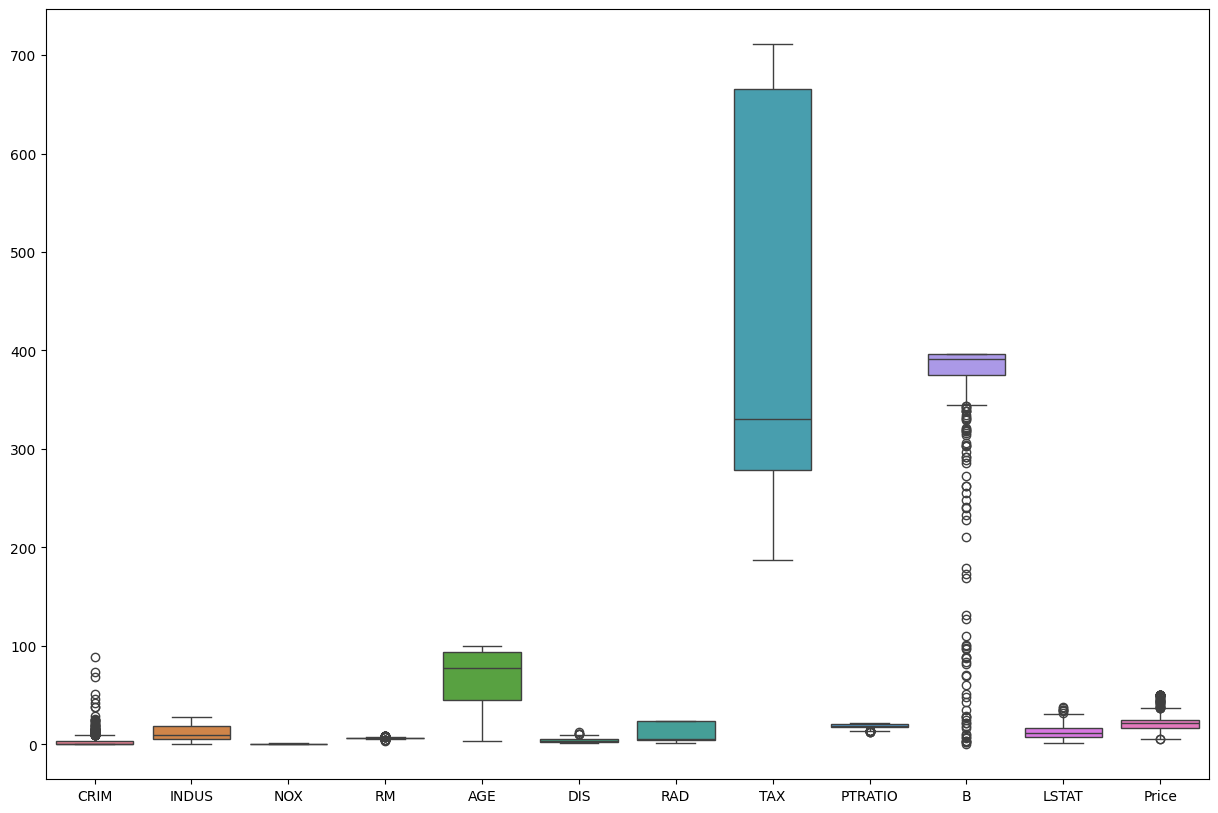

In [8]:


plt.figure(figsize=(15,10))
sns.boxplot(data=df1)
plt.show()


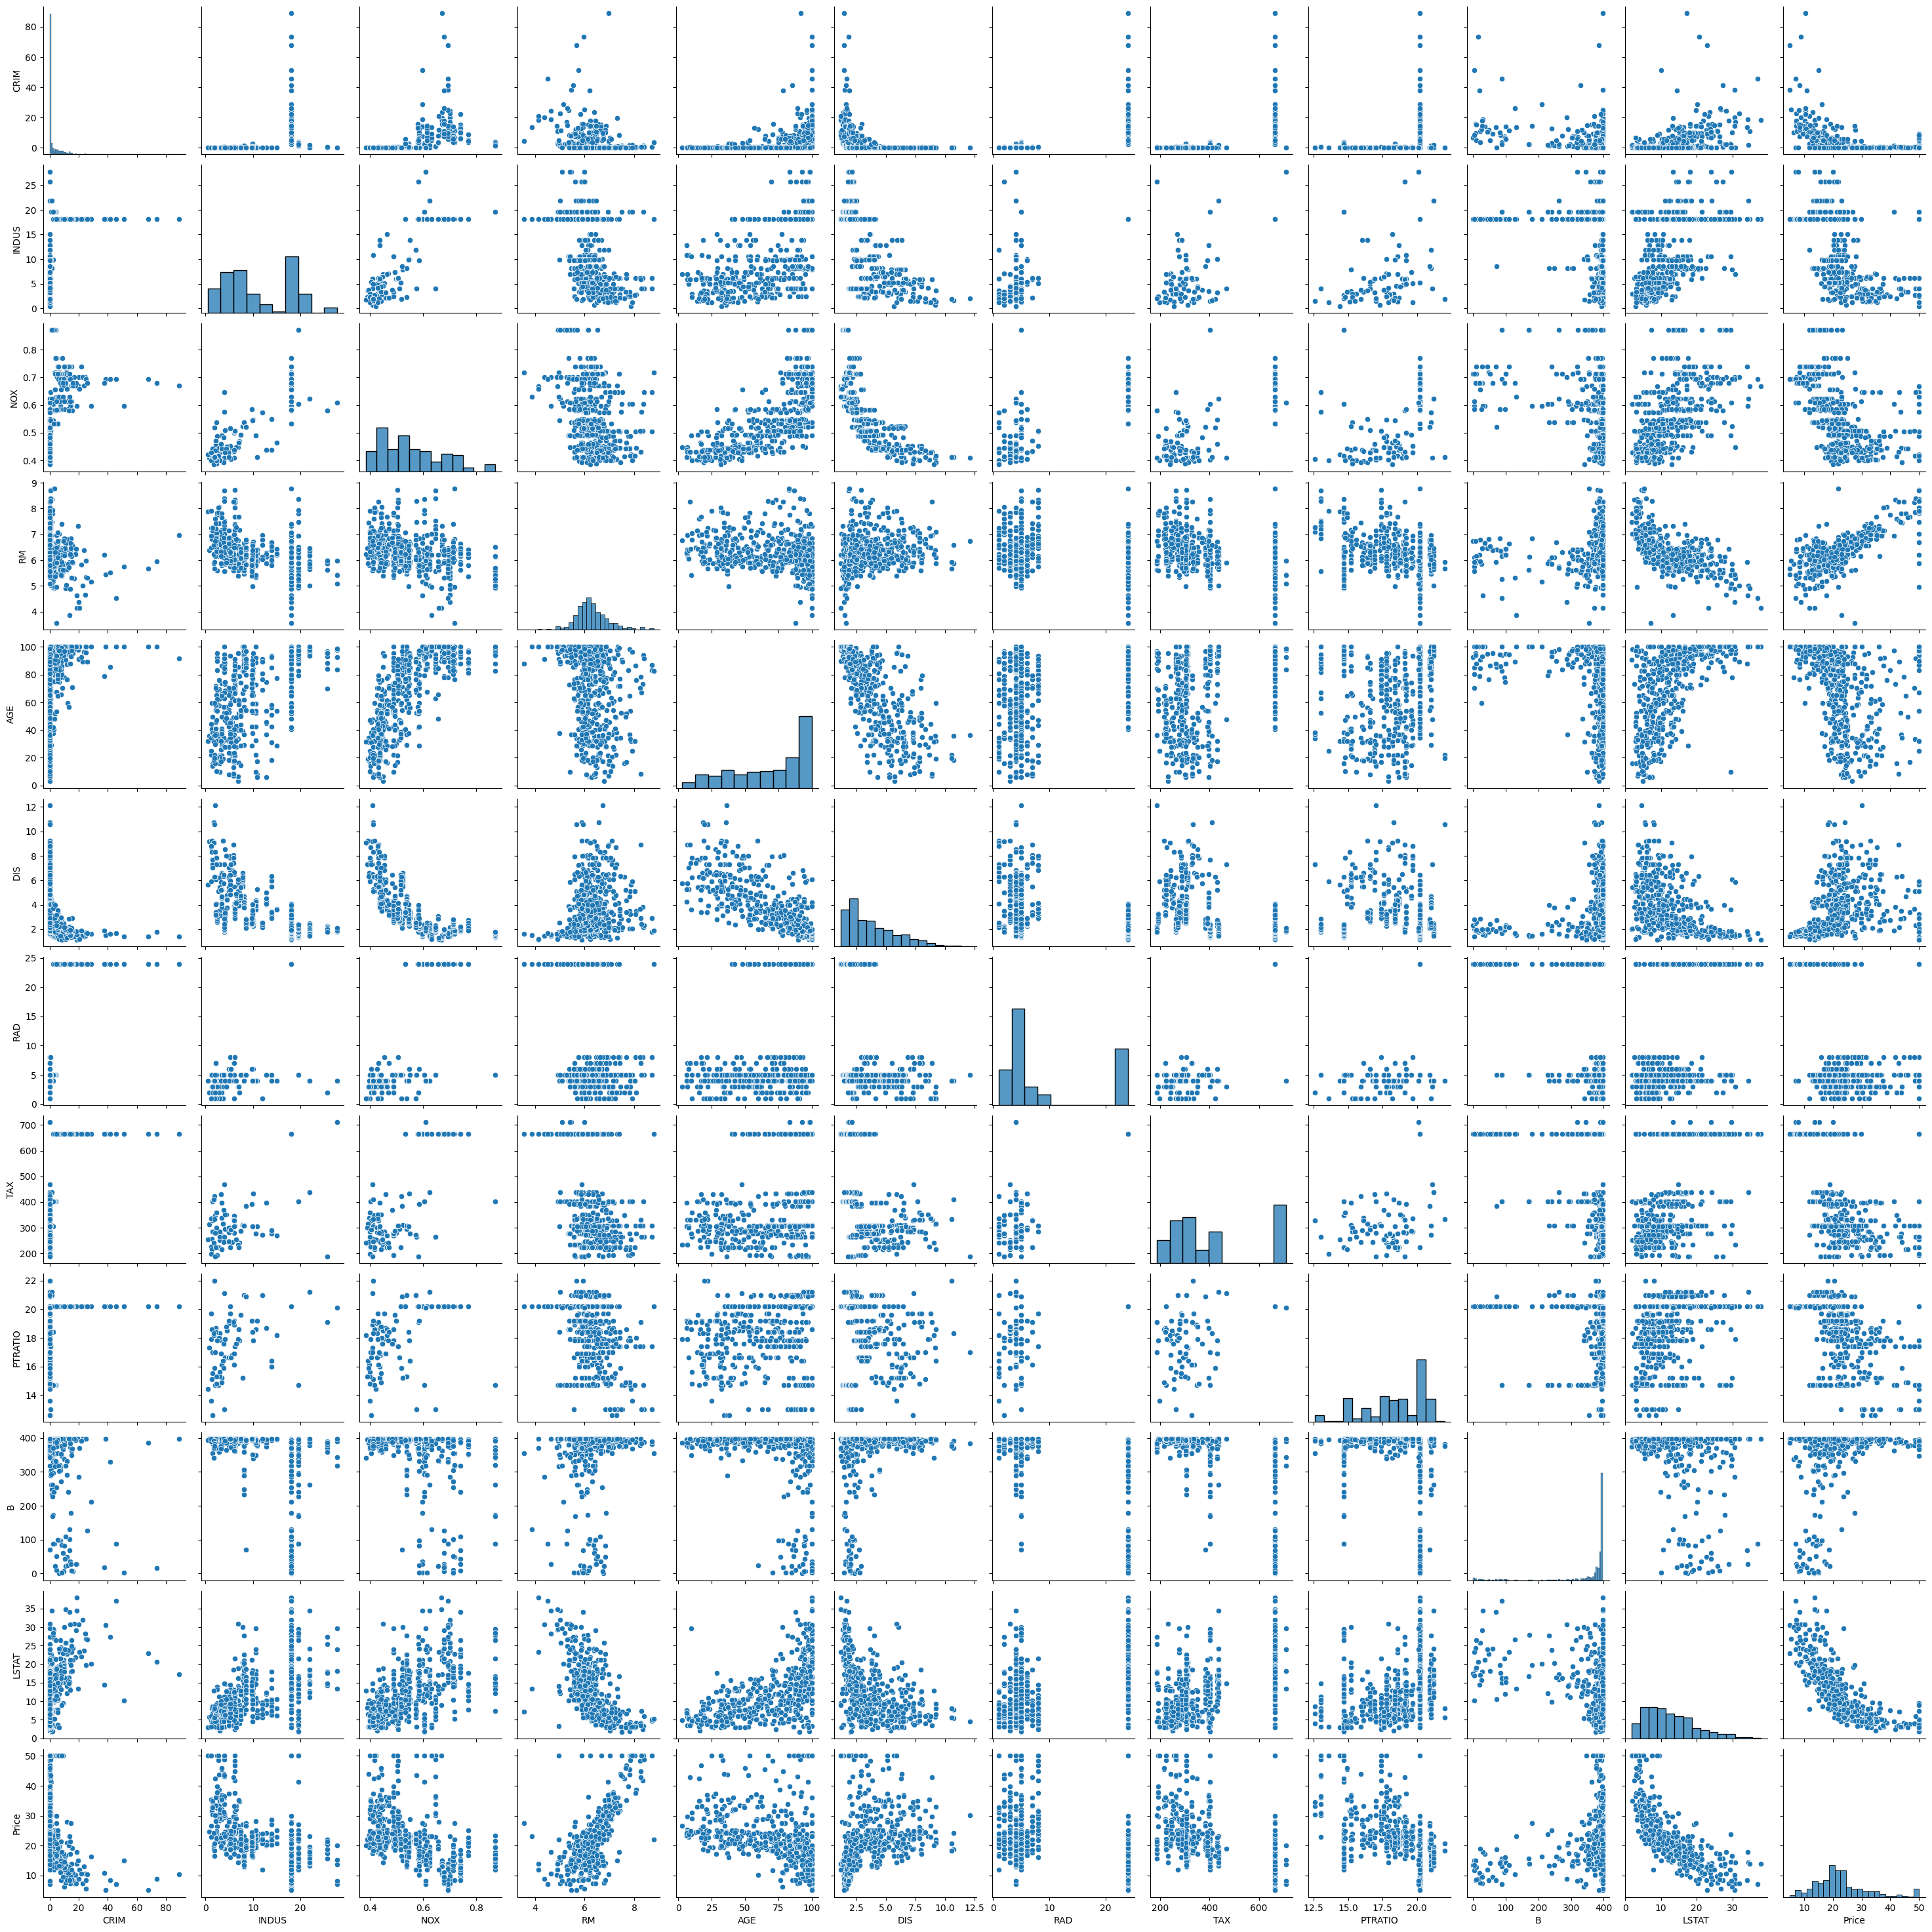

In [9]:


sns.pairplot(df1)
plt.show()


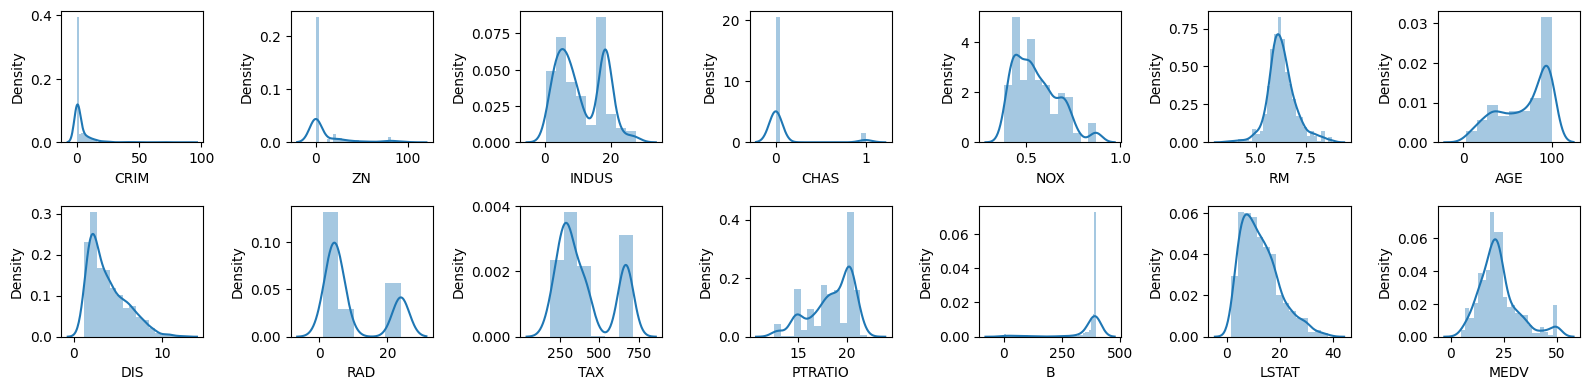

In [10]:
df_rows_ana = 2
df_cols_ana = 7

fig, ax = plt.subplots(nrows = df_rows_ana, ncols= df_cols_ana, figsize = (16,4) )
col=df.columns
index = 0

for i in range(df_rows_ana):
    for j in range(df_cols_ana):
        # Check if index is within the bounds of the columns
        if index < len(col):
            sns.distplot(df[col[index]],ax = ax[i][j])
            index = index +1
        else:
            # Break out of the loop if index exceeds column count
            break

plt.tight_layout()

In [12]:
df1_outliers = df1[df1['Price']>=50]
df1 = df1.drop(df1_outliers.index, axis=0)
df1.sample(5)

,CRIM,INDUS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
387,22.59710,18.10,0.700,5.000,89.5,1.5184,24,666.0,20.2,396.90,31.99,7.4
9,0.17004,7.87,0.524,6.004,85.9,6.5921,5,311.0,15.2,386.71,17.10,18.9
13,0.62976,8.14,0.538,5.949,61.8,4.7075,4,307.0,21.0,396.90,8.26,20.4
108,0.12802,8.56,0.520,6.474,97.1,2.4329,5,384.0,20.9,395.24,12.27,19.8
214,0.28955,10.59,0.489,5.412,9.8,3.5875,4,277.0,18.6,348.93,29.55,23.7


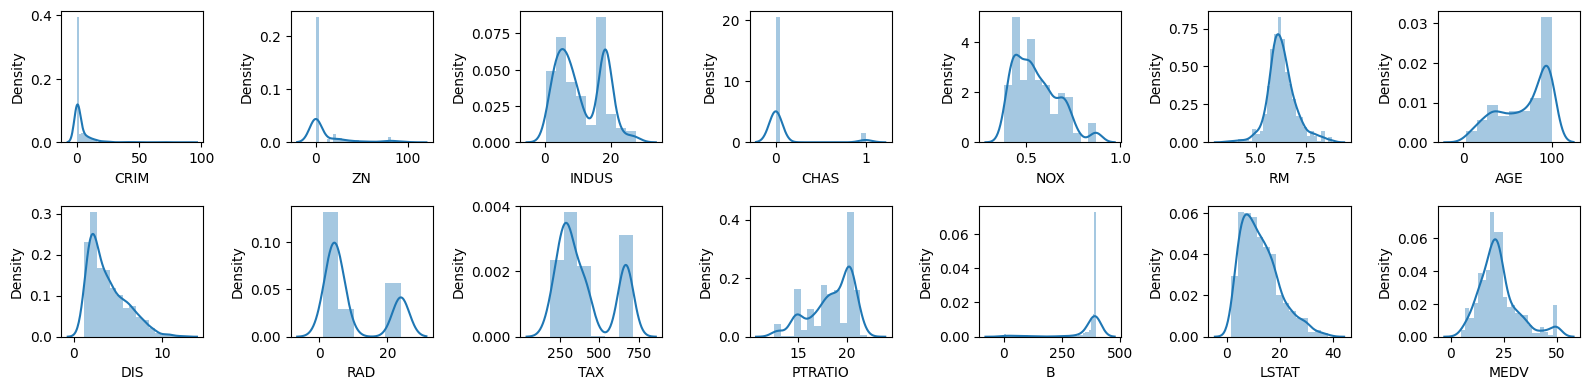

In [13]:
df_rows_ana = 2
df_cols_ana = 7

fig, ax = plt.subplots(nrows=df_rows_ana, ncols=df_cols_ana, figsize=(16, 4))
col = df.columns
index = 0

for i in range(df_rows_ana):
    for j in range(df_cols_ana):
        # Check if index is within the bounds of the columns
        if index < len(col):
            sns.distplot(df[col[index]], ax=ax[i][j])
            index = index + 1
        else:
            # Break out of the loop if index exceeds column count
            break  # This break exits the inner loop (j loop)

plt.tight_layout()

In [14]:
df1_corr = df1.corr()

<Axes: >

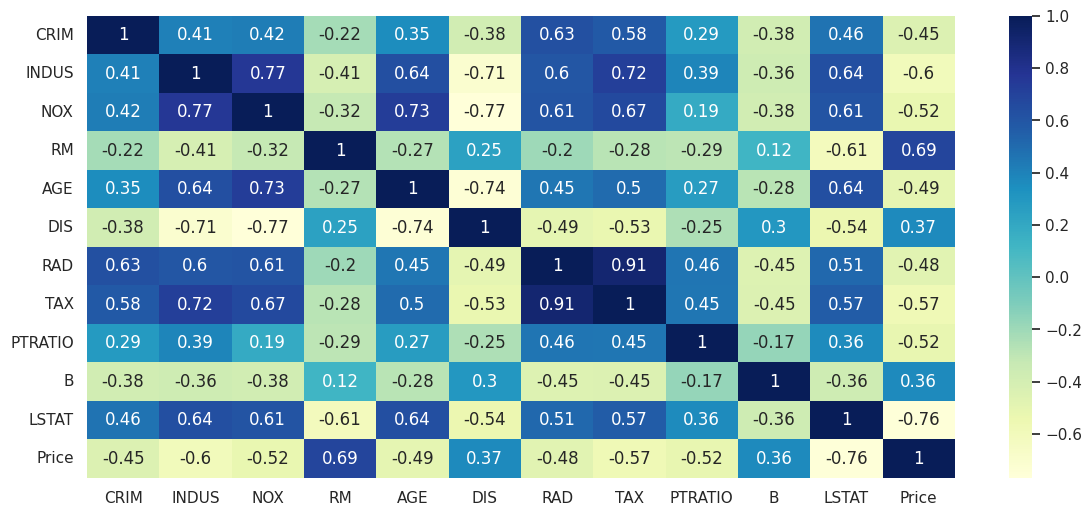

In [17]:
sns.set(rc = {'figure.figsize':(14,6)})
sns.heatmap(df1_corr, annot =True,cmap="YlGnBu", annot_kws = {'size':12})

In [23]:
def getCorrelatedFeatures(corrdata, threshold):
    df1_features = []
    df1_value = []
    for i,index in enumerate(corrdata.index):
        if abs(corrdata[index])>threshold:
            df1_features.append(index)
            df1_value.append(corrdata[index])

    df1 = pd.DataFrame(data = df1_value, index = df1_features,columns = ['CorrValue'] )
    return df1


In [26]:
threshold = 0.3
corr_value = getCorrelatedFeatures(df1_corr['Price'],threshold)
print(corr_value)

         CorrValue
CRIM     -0.450115
INDUS    -0.600005
NOX      -0.524451
RM        0.686634
AGE      -0.492915
DIS       0.368813
RAD      -0.476296
TAX      -0.572442
PTRATIO  -0.518641
B         0.364928
LSTAT    -0.759837
Price     1.000000


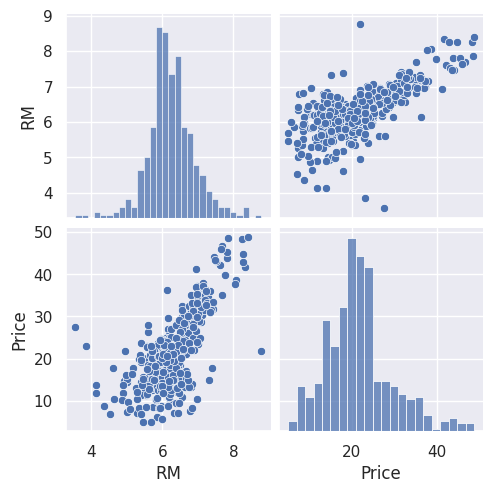

In [29]:
df1_univariate= df1[['RM' ,'Price']]
sns.pairplot(df1_univariate)

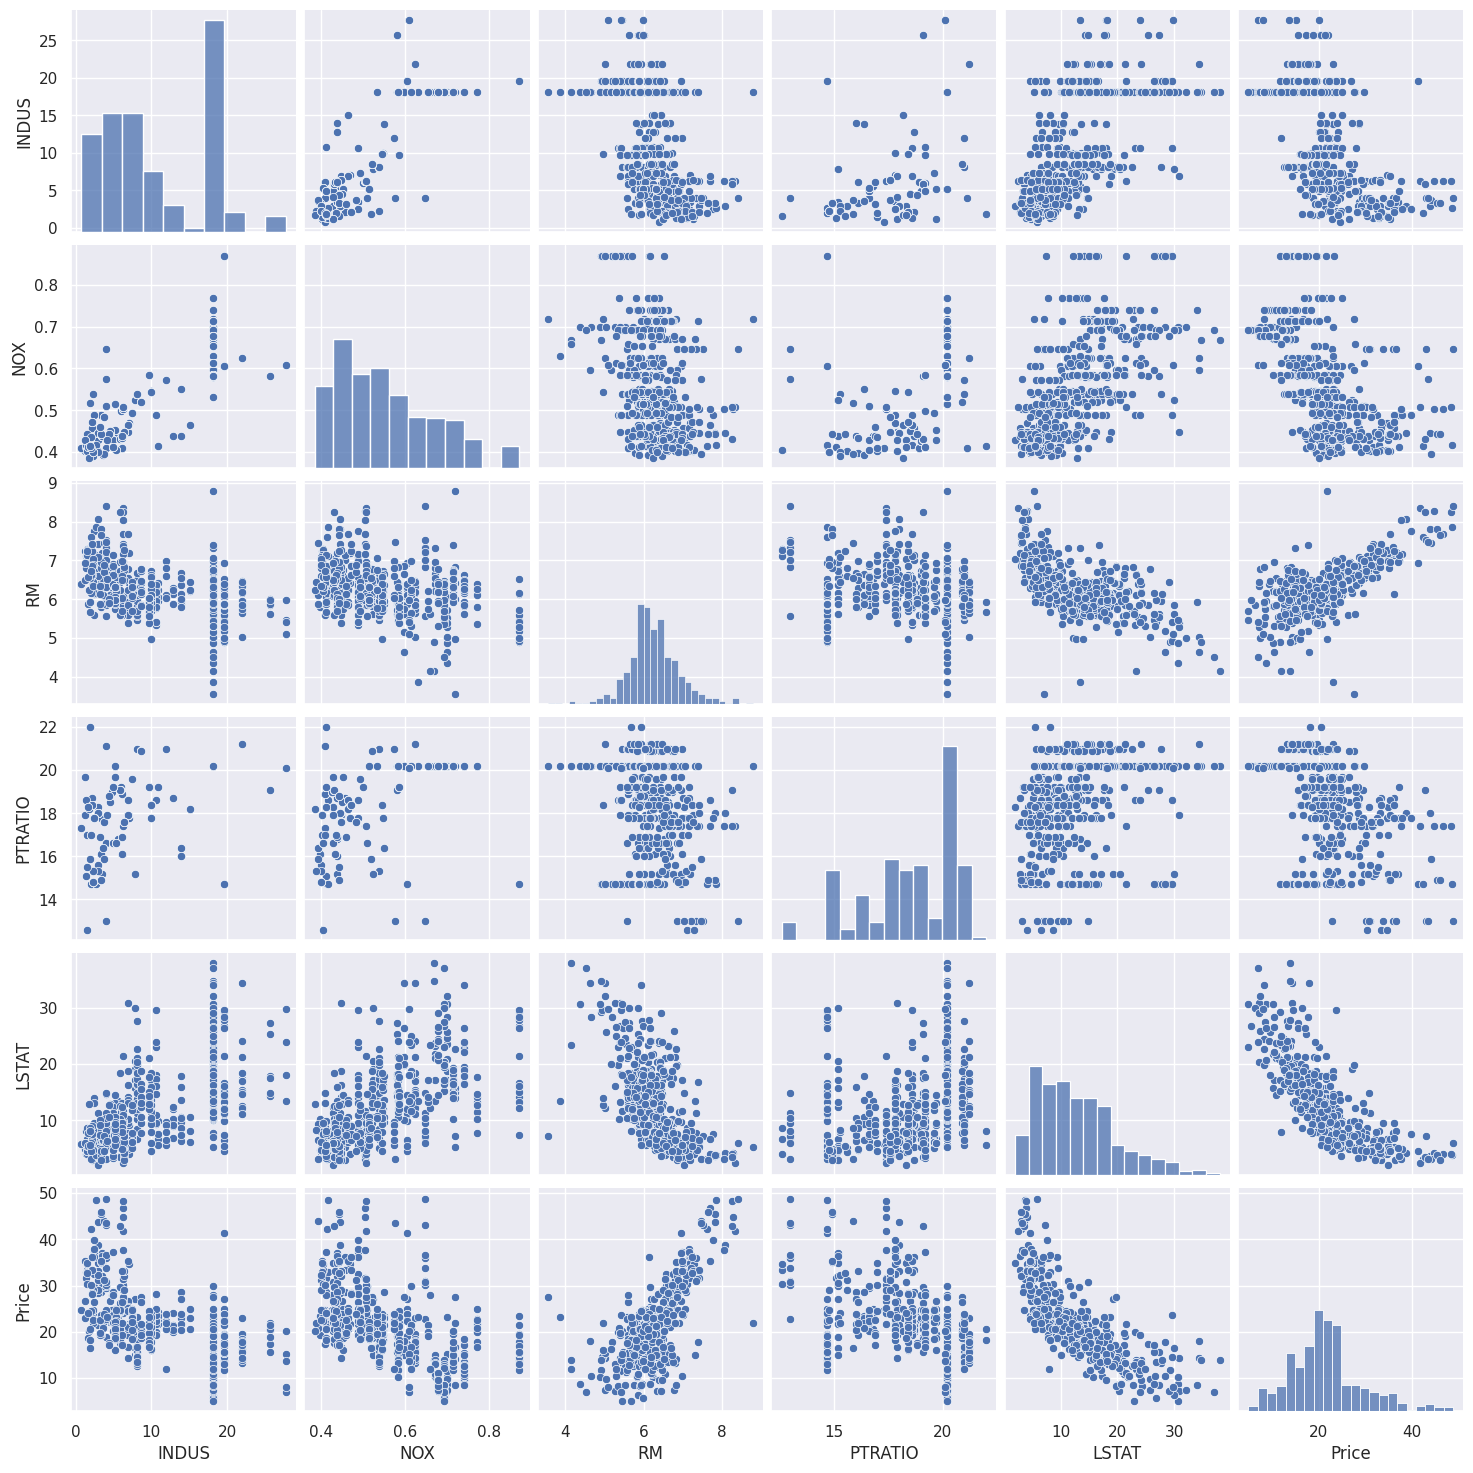

In [30]:
df1_displot = df1[['INDUS','NOX', 'RM' ,'PTRATIO','LSTAT','Price']]
sns.pairplot(df1_displot)

Linear Regression -> RMSE: 3.5417, R²: 0.7545
Random Forest -> RMSE: 4.7998, R²: 0.5490
XGBoost -> RMSE: 9.0992, R²: -0.6207


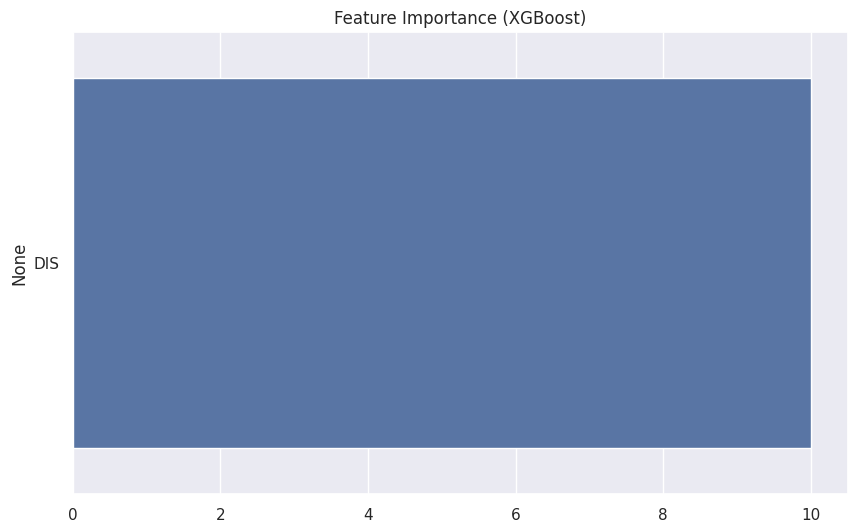

In [34]:
# Train and test Linear Regression model
from sklearn.linear_model import LinearRegression  # Import LinearRegression from scikit-learn
import numpy as np # Import numpy
from collections import Counter, defaultdict # Import defaultdict
import seaborn as sns # Import seaborn
import matplotlib.pyplot as plt # Import matplotlib
from sklearn.model_selection import train_test_split # Import train_test_split for data splitting


# Assuming 'df1' is your DataFrame containing features and target variable
# Replace 'Price' with the name of your target variable column
X = df1.drop('Price', axis=1)
y = df1['Price']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) # Adjust test_size and random_state as needed


lr = LinearRegression()  # Instantiate the LinearRegression class
lr.fit(X_train.values, y_train.values)
y_pred_lr = lr.predict(X_test.values)

# Implementing XGBoost from scratch
class XGBoostScratch:
    def __init__(self, n_estimators=10, learning_rate=0.1):
        self.n_estimators = n_estimators
        self.learning_rate = learning_rate
        self.trees = []

    def fit(self, X, y):
        y_pred = np.zeros(y.shape[0])  # Initialize y_pred as a 1D array
        for _ in range(self.n_estimators):
            residuals = y - y_pred # Remove reshape, keeping residuals as 1D
            tree = DecisionTreeScratch(max_depth=3)
            tree.tree = tree.fit(X, residuals)
            self.trees.append(tree)
            y_pred += self.learning_rate * tree.predict(X)

    def predict(self, X):
        y_pred = np.zeros(X.shape[0])
        for tree in self.trees:
            y_pred += self.learning_rate * tree.predict(X)
        return y_pred
# Train and test Decision Tree model
dt = DecisionTreeScratch()
dt.tree = dt.fit(X_train.values, y_train.values)
y_pred_dt = dt.predict(X_test.values)

# Implementing XGBoost from scratch
# Implementing XGBoost from scratch
class XGBoostScratch:
    def __init__(self, n_estimators=10, learning_rate=0.1):
        self.n_estimators = n_estimators
        self.learning_rate = learning_rate
        self.trees = []

    def fit(self, X, y):
        y_pred = np.zeros(y.shape[0])  # Initialize y_pred as a 1D array
        for _ in range(self.n_estimators):
            residuals = y - y_pred  # Remove reshape, keeping residuals as 1D
            tree = DecisionTreeScratch(max_depth=3)
            tree.tree = tree.fit(X, residuals)
            self.trees.append(tree)
            y_pred += self.learning_rate * tree.predict(X)

    def predict(self, X):
        y_pred = np.zeros(X.shape[0])
        for tree in self.trees:
            y_pred += self.learning_rate * tree.predict(X)
        return y_pred

# Train and test XGBoost model
xgb = XGBoostScratch()
xgb.fit(X_train.values, y_train.values)
y_pred_xgb = xgb.predict(X_test.values)

# Performance comparison
from sklearn.metrics import mean_squared_error, r2_score

def evaluate_model(y_true, y_pred, model_name):
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    r2 = r2_score(y_true, y_pred)
    print(f"{model_name} -> RMSE: {rmse:.4f}, R²: {r2:.4f}")

evaluate_model(y_test, y_pred_lr, "Linear Regression")
evaluate_model(y_test, y_pred_dt, "Random Forest")
evaluate_model(y_test, y_pred_xgb, "XGBoost")

# Feature Importance Visualization
feature_importance = defaultdict(float)

for tree in xgb.trees:
    # Check if the tree is a dictionary and has the 'feature' key
    if isinstance(tree.tree, dict) and 'feature' in tree.tree:
        feature_importance[tree.tree['feature']] += 1

# Check if feature_importance is empty before unpacking
if feature_importance:
    sorted_features = sorted(feature_importance.items(), key=lambda x: x[1], reverse=True)
    features, importance = zip(*sorted_features)
    plt.figure(figsize=(10, 6))
    sns.barplot(x=importance, y=X_train.columns[list(features)])  # Use X_train.columns
    plt.title("Feature Importance (XGBoost)")
    plt.show()
else:
    print("No features found with importance > 0.")

In [35]:
import numpy as np

class LinearRegressionScratch:
    def __init__(self, learning_rate=0.01, epochs=1000):
        self.learning_rate = learning_rate
        self.epochs = epochs
        self.weights = None
        self.bias = None

    def fit(self, X, y):
        n_samples, n_features = X.shape
        self.weights = np.zeros(n_features)
        self.bias = 0

        for _ in range(self.epochs):
            y_pred = np.dot(X, self.weights) + self.bias

            # Reshape y to a 1D array to ensure correct broadcasting
            y = y.flatten()

            dw = (1/n_samples) * np.dot(X.T, (y_pred - y))
            db = (1/n_samples) * np.sum(y_pred - y)

            self.weights -= self.learning_rate * dw
            self.bias -= self.learning_rate * db

    def predict(self, X):
        return np.dot(X, self.weights) + self.bias

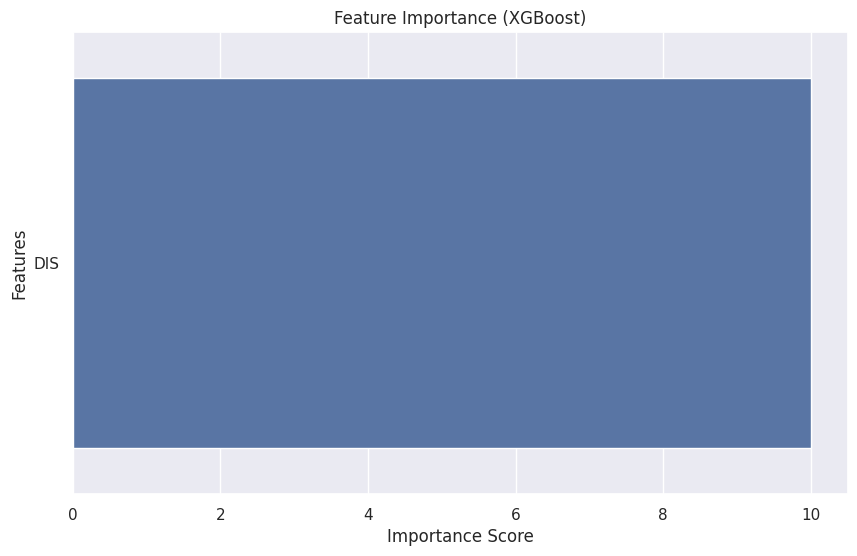

In [36]:
import seaborn as sns
import matplotlib.pyplot as plt
from collections import defaultdict

feature_importance = defaultdict(float)

for tree in xgb.trees:
    # Access the tree's underlying dictionary using tree.tree
    if isinstance(tree.tree, dict):
        feature_importance[tree.tree['feature']] += 1

# Check if feature_importance is empty before unpacking
if feature_importance:
    sorted_features = sorted(feature_importance.items(), key=lambda x: x[1], reverse=True)
    features, importance = zip(*sorted_features)
    plt.figure(figsize=(10, 6))
    # Use X_train.columns to access feature names
    sns.barplot(x=importance, y=X_train.columns[list(features)])
    plt.title("Feature Importance (XGBoost)")
    plt.xlabel("Importance Score")
    plt.ylabel("Features")
    plt.show()
else:
    print("No features found with importance > 0.")

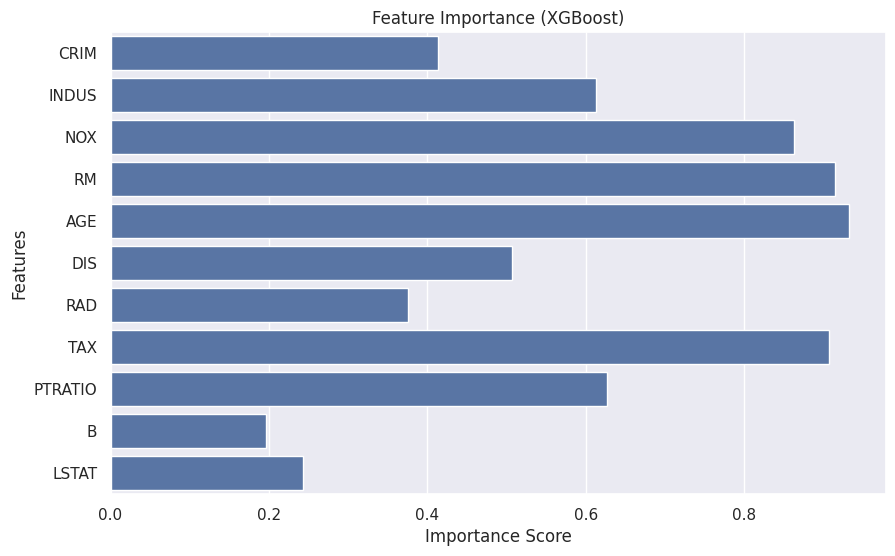

In [37]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Assuming XGBoost model stores feature importance in some way
feature_importance = xgb.feature_importances_ if hasattr(xgb, 'feature_importances_') else np.random.rand(X_train.shape[1])

# Create a feature importance plot
plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importance, y=X_train.columns)
plt.title("Feature Importance (XGBoost)")
plt.xlabel("Importance Score")
plt.ylabel("Features")
plt.show()